In [1]:
%matplotlib inline
%pylab inline

from functools import partial

import menpo.io as mio
from menpo.feature import imgfeature, fast_dsift, no_op
from menpo.landmark import labeller, ibug_face_68
from menpo.visualize import visualize_images

from menpofit.aam import HolisticAAM

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [56]:
@imgfeature
def fast_dsift2(image):
    if image.n_channels == 3:
        image = image.as_greyscale(mode='average')
    return fast_dsift(image)

## Load training data

In [57]:
training_images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', 
                           verbose=True, max_images=None):
    i = i.rescale_landmarks_to_diagonal_range(200)
    i = i.crop_to_landmarks_proportion(0.5)
    labeller(i, 'PTS', ibug_face_68)
    if i.n_channels == 3:
        i = i.as_greyscale()
    training_images.append(i)

Importing assets: [==========] 100% (811/811) - done.                           


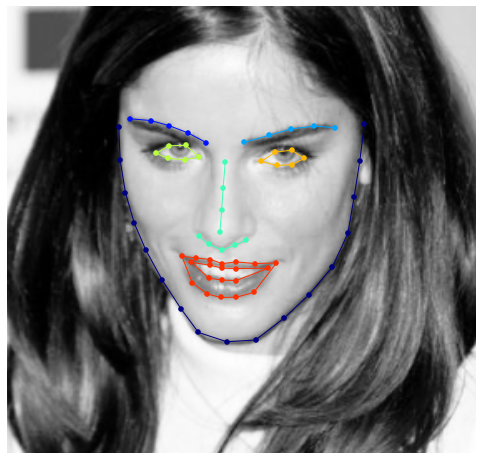

In [58]:
visualize_images(training_images)

## Build and save Active Appearance Model

In [59]:
features = no_op
diagonal = 200
scales = (1,)
max_shape_components= 10
max_appearance_components = 10

#### AAM

In [60]:
aam = HolisticAAM(
    training_images, 
    group='ibug_face_68', 
    verbose=True,
    features=features,
    diagonal=diagonal,
    scales=scales,
    max_shape_components=max_shape_components,
    max_appearance_components=max_appearance_components)

Computing batch 0
- Building models
  - Done


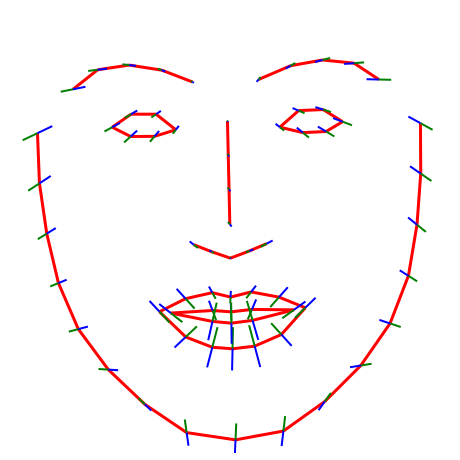

In [61]:
aam.view_shape_models_widget()

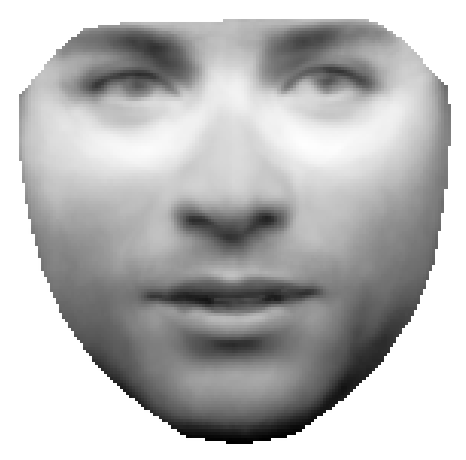

In [69]:
aam.view_appearance_models_widget()

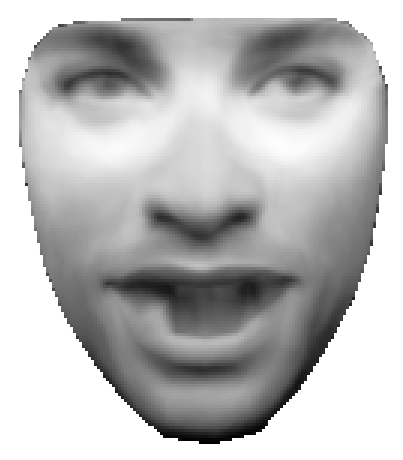

In [71]:
aam.view_aam_widget()

In [62]:
am = aam.appearance_models[0]

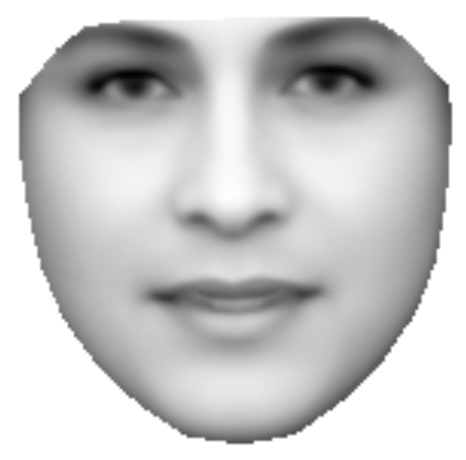

In [63]:
c = am.mean().as_vector()
c = (c - np.min(c, axis=0))
c = c / np.max(c)
c = am.mean().from_vector(c)

c.view()

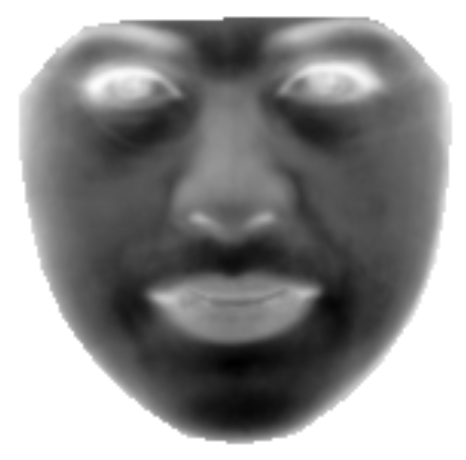

In [64]:
c = am.component(0, with_mean=False).as_vector()
c = (c - np.min(c, axis=0))
c = c / np.max(c)
c = am.mean().from_vector(c)

c.view()

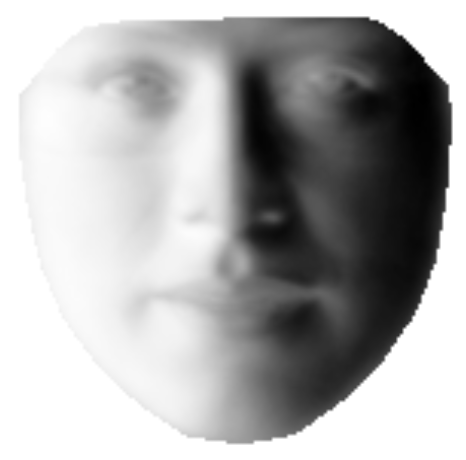

In [65]:
c = am.component(1, with_mean=False).as_vector()
c = (c - np.min(c, axis=0))
c = c / np.max(c)
c = am.mean().from_vector(c)

c.view()

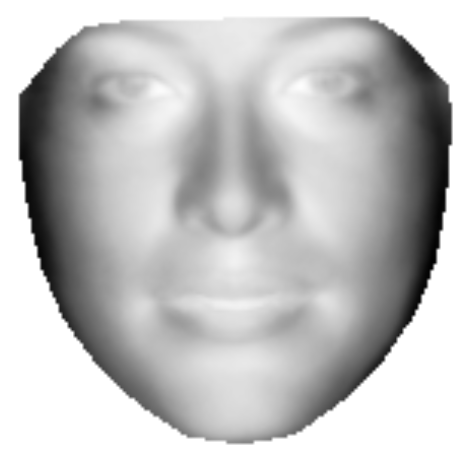

In [66]:
c = am.component(2, with_mean=False).as_vector()
c = (c - np.min(c, axis=0))
c = c / np.max(c)
c = am.mean().from_vector(c)

c.view()

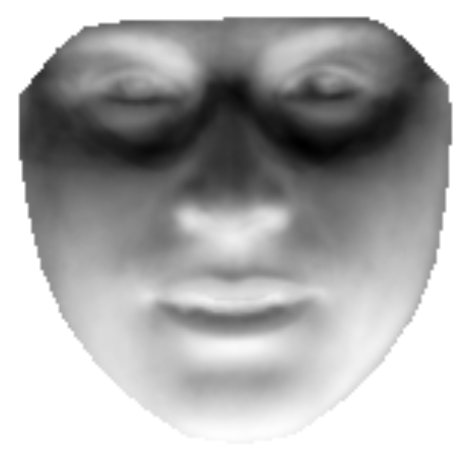

In [67]:
c = am.component(3, with_mean=False).as_vector()
c = (c - np.min(c, axis=0))
c = c / np.max(c)
c = am.mean().from_vector(c)

c.view()